In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Lets build a knn classifier on this dataset. The input features will be:- Sepal length and width. and output will be the species name. First of all. we need to change the species to a numerical column. 

In [8]:
data['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2},inplace=True)

In [9]:
X = data.loc[:,['SepalLengthCm','SepalWidthCm']].values
y = data.loc[:,'Species'].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [11]:
# Finding k by square root of length of X_train
np.sqrt(X_train.shape[0])

10.954451150103322

In [12]:
k = 11 # This should always be odd to avoid ambiguity

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
knn = KNeighborsClassifier(n_neighbors=k)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [16]:
print('Accuracy Score:',accuracy_score(y_test,knn.predict(X_test))*100,'%')

Accuracy Score: 80.0 %


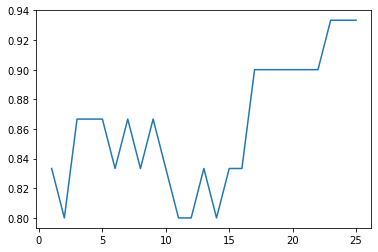

In [17]:
# Using the trial and error method to find the best k which gives maximum accuracy
x=[]
accuracy=[]
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    _ = knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))
    x.append(i)
plt.plot(x,accuracy)

From the above graph, we see that the model acheives a accuracy close to 94% when value of k is 24, 25

In [18]:
knn = KNeighborsClassifier(n_neighbors=24)
_ = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy Score: 93.33 %
Confusion Matrix:
 [[ 7  2  0]
 [ 0  5  0]
 [ 0  0 16]]


# Decision Boundary of KNN Classifier

In [19]:
# creating the meshgrid
a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,\
             step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,\
             step=0.01)

XX,YY = np.meshgrid(a,b)
XX.shape

(420, 560)

In [20]:
input_array = np.array([XX.ravel(),YY.ravel()]).T
input_array.shape

(235200, 2)

In [21]:
output = knn.predict(input_array).reshape(XX.shape)
output.shape

(420, 560)

Text(0.5, 1.0, 'Decision Boundary of KNN classifier')

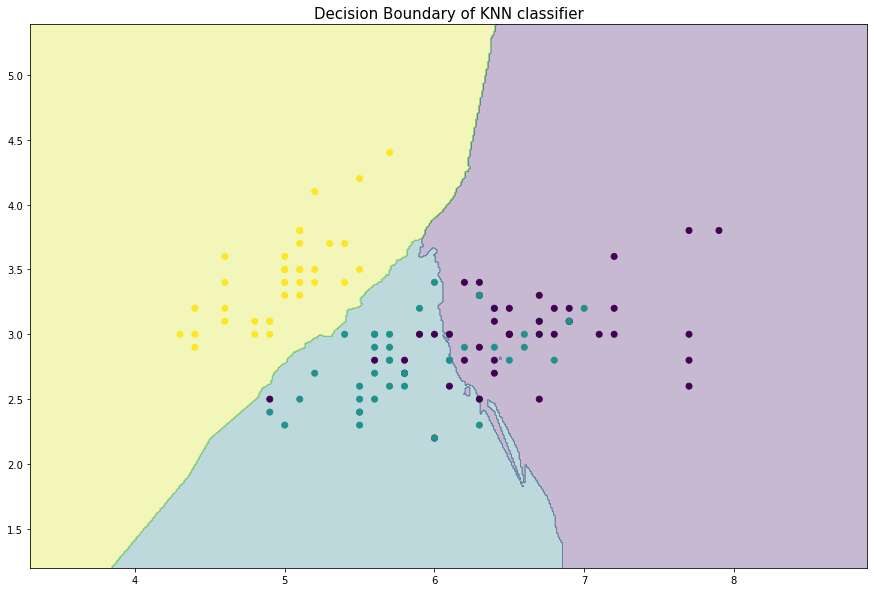

In [22]:
plt.figure(figsize=(15,10))
plt.contourf(XX,YY,output,alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.title('Decision Boundary of KNN classifier',fontsize=15)

# Training / Validation Error rate based on different values of K

In [23]:
training_error_list = []
validation_error_list = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    _ = knn.fit(X_train,y_train)
    training = confusion_matrix(y_train,knn.predict(X_train))
    validation = confusion_matrix(y_test,knn.predict(X_test))
    training_error = training[0][1]+training[0][2]+training[1][0]+training[1][2]+training[2][0]+training[2][1]
    validation_error = validation[0][1]+validation[0][2]+validation[1][0]+validation[1][2]+validation[2][0]+validation[2][1]
    training_error_list.append(training_error/training.sum())
    validation_error_list.append(validation_error/validation.sum())

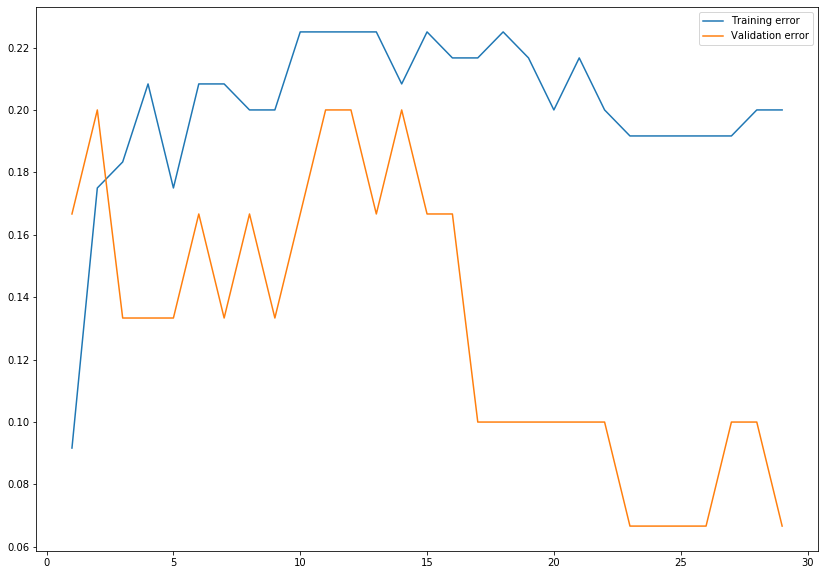

In [24]:
plt.figure(figsize=(14,10))
plt.plot(range(1,30),training_error_list,label='Training error')
plt.plot(range(1,30),validation_error_list,label='Validation error')
plt.legend()